In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df = pd.read_excel('../stats/ANALIZISRE/all_data.xlsx')

In [3]:
df.columns

Index(['stimulus_name', 'stimulus_type', 'stimulus_id', 'stimulus_plaus',
       'word_order', 'nom_1_X', 'nom_2_O', 'retried', 'key_resp.keys',
       'answer', 'answer_role', 'key_resp.rt', 'nom1_indented',
       'nom2_indented', 'stimulus.started', 'stimulus.stopped', 'participant',
       'session', 'date', 'list_name', 'random_seed', 'frameRate',
       'Unnamed: 22'],
      dtype='object')

In [4]:
bins = np.linspace(1, 8, 15)

## Plauzibilis és implauzibilis jeleneteknél különböző idő alatt nyomják-e a tesztalanyok a gombot?

(0.9830576181411743, 1.437859520336815e-08)
4.02698965909091 1.3829338514614742
(0.9781509041786194, 3.300081874435534e-10)
3.8135811363636347 1.335703988482744
MannwhitneyuResult(statistic=352071.5, pvalue=0.0004917592729558675)


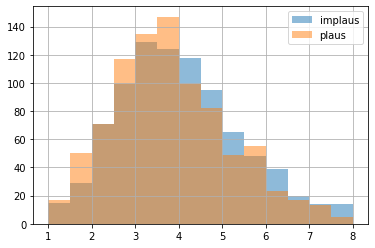

In [36]:
s1, s2 = df.loc[df['stimulus_plaus'] == 'implaus']['key_resp.rt'], df.loc[df['stimulus_plaus'] == 'plaus']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))

plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=False, label = 'implaus')
plt.hist(s2, alpha = 0.5, bins=bins, density=False, label = 'plaus')
plt.legend()
plt.grid()
plt.show()

### Igen, az implauzibilis nehezebb.
Nem normálisak az eloszlások, nem tudunk paraméteres próbát használni, így Mann Whitneyt kell használnunk.
Ez azt mutatja, hogy szignifikáns a különbség, tehát az implauzibilis jeleneteknél több időt töltöttek a gomb megnyomásával.

## A mondat szórendje befolyásolja-e a gombnyomás idejét?

(0.9838947653770447, 0.00021533644758164883)
3.951196212121212 1.4357568135437029
(0.9665507674217224, 4.73958206015368e-09)
3.6405493801652877 1.4110438851011808
MannwhitneyuResult(statistic=83035.0, pvalue=0.0003232351523540144)


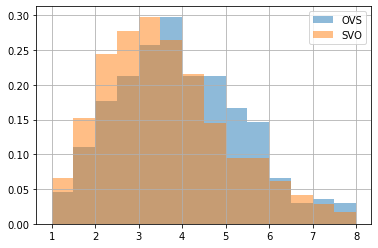

In [39]:
s1, s2 = df.loc[df['word_order'] == 'OVS']['key_resp.rt'], df.loc[df['word_order'] == 'SVO']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))

print(stats.mannwhitneyu(s1, s2))

plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'OVS')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'SVO')
plt.legend()
plt.grid()
plt.show()

### Igen, az OVS több idő.

## Gombnyomások befolyása a gomb és a válasz helyzetére? (fent, lent, o, x)

(0.9785735607147217, 6.754377612772089e-10)
3.896769194865811 1.3588178742950747
(0.9819102883338928, 3.864282227539206e-09)
3.94260365448505 1.36795322552275
MannwhitneyuResult(statistic=379299.5, pvalue=0.236842376347824)


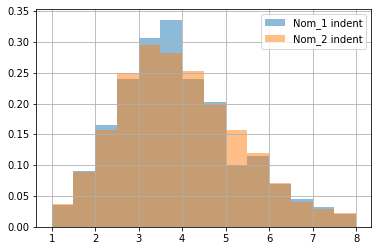

(0.9776185154914856, 1.4952426796721596e-10)
3.9135073089701 1.354137300410475
(0.9831515550613403, 2.2901623708548868e-08)
3.922669626168224 1.3674052424628236
MannwhitneyuResult(statistic=382946.0, pvalue=0.3698545787135207)


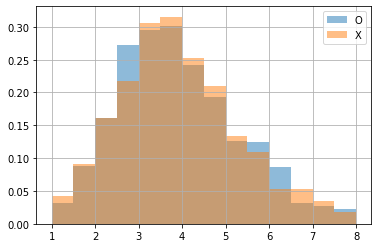

In [77]:
s1, s2 = df.loc[df['nom1_indented'] == 0]['key_resp.rt'], df.loc[df['nom1_indented'] == 1]['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))
plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'Nom_1 indent')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'Nom_2 indent')
plt.legend()
plt.grid()
plt.show()
s1, s2 = df.loc[df['key_resp.keys'] == 'o']['key_resp.rt'], df.loc[df['key_resp.keys'] == 'x']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))



plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'O')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'X')
plt.legend()
plt.grid()
plt.show()

### **Nem** befolyásolja az indentálás és a gomb helye a válaszidőt.

## Ágens/páciens alapú válasz befolyása a válaszidőre

(0.9912786483764648, 0.03080090507864952)
4.156793663911845 1.3855738568838414
(0.9771661758422852, 4.4363540347824165e-14)
3.8558640401146143 1.3471347023962743
MannwhitneyuResult(statistic=218370.0, pvalue=2.4513073196336298e-05)


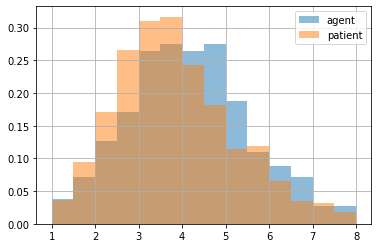

In [38]:
s1, s2 = df.loc[df['answer_role'] == 'a']['key_resp.rt'], df.loc[df['answer_role'] == 'p']['key_resp.rt']
print(stats.shapiro(s1))
print(np.mean(s1), np.std(s1))
print(stats.shapiro(s2))
print(np.mean(s2), np.std(s2))
print(stats.mannwhitneyu(s1, s2))

plt.figure(figsize = (6,4))
plt.hist(s1, alpha = 0.5, bins=bins, density=True, label = 'agent')
plt.hist(s2, alpha = 0.5, bins=bins, density=True, label = 'patient')
plt.legend()
plt.grid()
plt.show()

### Befolyásolja, különbözőek, az ágens nehezebb.

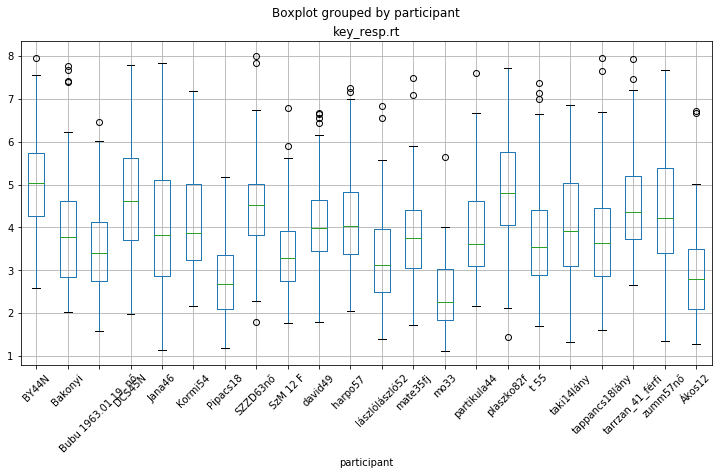

In [28]:
df.boxplot(column = 'key_resp.rt', by='participant', figsize=(12,6), rot = 45)

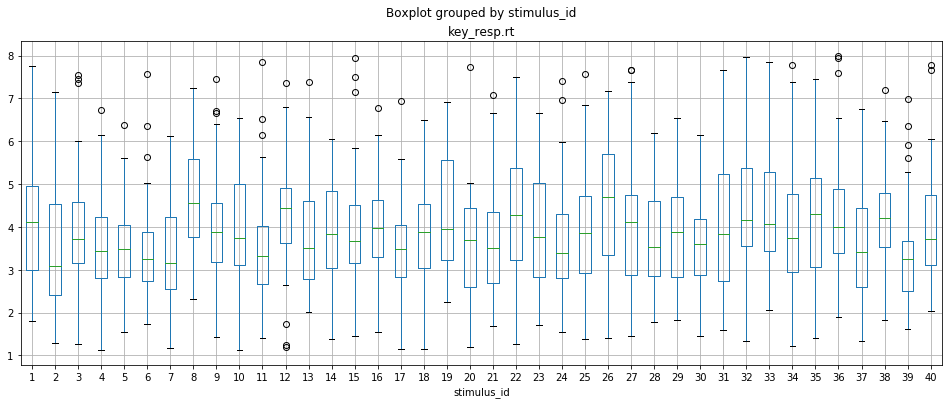

In [35]:
df.boxplot(column = 'key_resp.rt', by='stimulus_id', figsize=(16,6), rot = 0)

In [40]:
df.columns

Index(['stimulus_name', 'stimulus_type', 'stimulus_id', 'stimulus_plaus',
       'word_order', 'nom_1_X', 'nom_2_O', 'retried', 'key_resp.keys',
       'answer', 'answer_role', 'key_resp.rt', 'nom1_indented',
       'nom2_indented', 'stimulus.started', 'stimulus.stopped', 'participant',
       'session', 'date', 'list_name', 'random_seed', 'frameRate',
       'Unnamed: 22'],
      dtype='object')

In [4]:
df['key_resp_rt'] = df['key_resp.rt']

In [5]:
rt_summ = df.groupby(['stimulus_name', 'stimulus_id', 'stimulus_type', 'stimulus_plaus']).key_resp_rt.describe()


In [6]:
rt_summ.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [7]:
exp_df = pd.DataFrame(rt_summ).set_index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], append=True)

In [8]:
answ_roles_summ = df.groupby(['stimulus_name', 'stimulus_id', 'stimulus_type', 'stimulus_plaus']).answer_role.value_counts()

In [9]:
answ_roles_summ.keys

<bound method Series.keys of stimulus_name                                    stimulus_id  stimulus_type  stimulus_plaus  answer_role
01_plaus_cop_arrests_criminal.jpg                1            image          plaus           p              17
                                                                                             a               5
02_implaus_child_scolding_babysitter.jpg         2            image          implaus         p              13
                                                                                             a               9
03_plaus_doctor_uses_stethoscope_on_patient.jpg  3            image          plaus           p              20
                                                                                                            ..
A turistát itatja a pincér.                      18           sentence       plaus           a               1
A tűzoltó szállítja a nénit.                     4            sentence       plaus       

In [12]:
test_data = exp_df.join(pd.DataFrame(answ_roles_summ)).sort_values(by = ['stimulus_id', 'stimulus_name'])

In [15]:
rt_summ.query("stimulus_type == 'image'").sort_values('mean')

,,,,count,mean,std,min,25%,50%,75%,max
stimulus_name,stimulus_id,stimulus_type,stimulus_plaus,,,,,,,,
07_plaus_mother_feeding_baby.jpg,7,image,plaus,22.0,2.959645,1.090806,1.1724,2.422200,2.77650,3.478550,6.1231
11_plaus_lion_chases_guide.jpg,11,image,plaus,22.0,3.404950,1.137195,1.8688,2.665750,3.17665,3.903600,6.5146
24_implaus_child_pulls_father.jpg,24,image,implaus,22.0,3.465673,1.283902,1.5409,2.871975,3.39665,3.974875,7.4132
06_implaus_girl_frightens_ghost.jpg,6,image,implaus,22.0,3.514682,1.242136,2.0056,2.835725,3.27005,4.086075,7.5622
39_plaus_lifeguard_saves_grandma.jpg,39,image,plaus,22.0,3.577927,1.157363,1.7433,3.046100,3.40395,3.631350,6.9932
31_plaus_visitor_pushes_nurse.jpg,31,image,plaus,22.0,3.577941,1.285577,1.8621,2.526100,3.27520,4.216950,6.0440
37_plaus_man_proposing_to_woman.jpg,37,image,plaus,22.0,3.609377,1.035663,1.7129,2.849675,3.49525,4.148525,5.7954
25_plaus_santa_gives_present_to_girl.jpg,25,image,plaus,22.0,3.648705,1.133665,1.4467,2.968400,3.78820,4.290125,6.0614
13_plaus_pirate_kidnaping_princess.jpg,13,image,plaus,22.0,3.687673,1.128749,2.0639,2.946150,3.36955,4.406050,6.2501


In [ ]:
df.groupby(['stimulus_name']).count

# Asszociációs szabályok

Vagyis ha a 15-ös képre ágensi választ adott, akkor abból mit lehet mondani a 21-es képre vonatkozólag.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [56]:
answers_by_person = defaultdict(list)
for line in df[['stimulus_type', 'stimulus_id', 'stimulus_plaus', 'answer_role', 'participant']].values.astype(str):
    answers_by_person[line[4]] += ['+'.join(line[1:4])]
    
dataset = list(answers_by_person.values())

In [62]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_assoc = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_assoc, min_support=0.82, verbose=True, max_len=10, use_colnames=True)

Processing 901740 combinations | Sampling itemset size 10


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
rules['lens_antec'] = rules[['antecedents']].applymap(len)
rules['lens_conseq'] = rules[['consequents']].applymap(len)

Ez több analízist igényel.

In [ ]:
rules.query('lens_antec == 1').sort_values(by=['confidence', 'lens_conseq'] , ascending=False)

Ez még analízist igényel.